In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

C:\Users\ulasz\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ulasz\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [11]:
train = pd.read_csv('Data/our_train.csv')
test = pd.read_csv('Data/our_test.csv')
val = pd.read_csv('Data/our_val.csv')

In [12]:
X_train = train.drop('NObeyesdad', axis=1)
y_train = train['NObeyesdad']
X_test = test.drop('NObeyesdad', axis=1)
y_test = test['NObeyesdad']
X_val = val.drop('NObeyesdad', axis=1)
y_val = val['NObeyesdad']

In [4]:
CAEC_dict = {'no': 0, 'Sometimes': 0.33, 'Frequently': 0.66, 'Always': 1 }
CALC_dict = {'no': 0, 'Sometimes': 0.5, 'Frequently': 1}

In [13]:
X_train['CAEC'] = X_train['CAEC'].map(CAEC_dict)
X_train['CALC'] = X_train['CALC'].map(CALC_dict)
X_test['CAEC'] = X_test['CAEC'].map(CAEC_dict)
X_test['CALC'] = X_test['CALC'].map(CALC_dict)
X_val['CAEC'] = X_val['CAEC'].map(CAEC_dict)
X_val['CALC'] = X_val['CALC'].map(CALC_dict)

In [6]:
cat_cols2 = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']

In [7]:
def calculate_bmi(data):
    data['BMI'] = data['Weight'] / (data['Height'] ** 2)
    return data.drop(['Weight', 'Height', 'id'], axis=1)

In [8]:
pipeline = Pipeline([
    ('calculate_bmi', FunctionTransformer(calculate_bmi)),
])

In [14]:
# creating a new column bmi 
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_val = pipeline.transform(X_val)

In [15]:
X_train

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Male,32.000000,yes,no,2.000000,3.000000,0.33,no,1.000000,no,0.000000,2.000000,0.5,Automobile,39.183673
1,Female,19.783234,yes,yes,3.000000,3.000000,0.33,no,2.835622,no,1.655488,0.816986,0.5,Public_Transportation,40.325664
2,Male,21.793724,yes,yes,2.921225,2.983201,0.33,no,2.184843,no,2.164472,0.000000,0.5,Public_Transportation,28.499889
3,Female,21.000000,yes,yes,2.000000,3.000000,0.33,no,2.000000,no,1.000000,2.000000,0.5,Public_Transportation,23.665244
4,Female,25.470652,yes,yes,3.000000,3.000000,0.33,no,2.554007,no,0.025787,0.484165,0.5,Public_Transportation,40.504193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14525,Female,18.000000,yes,yes,2.628791,2.562895,0.33,no,1.844645,no,0.288032,0.722276,0.0,Public_Transportation,27.113666
14526,Male,22.000000,yes,no,3.000000,3.000000,0.33,no,2.000000,no,3.000000,0.000000,0.5,Public_Transportation,31.020408
14527,Male,21.000000,no,yes,2.000000,3.000000,1.00,no,3.000000,no,2.000000,0.000000,0.5,Public_Transportation,25.910684
14528,Female,26.000000,yes,yes,3.000000,3.000000,0.33,no,2.770732,no,0.000000,0.237307,0.5,Public_Transportation,41.110271


In [16]:
X_train.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'BMI'],
      dtype='object')

In [17]:
cols_numerical = [ 'Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'BMI']

In [18]:
#change categorical columns to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols2:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.fit_transform(X_test[col])
    X_val[col] = le.fit_transform(X_val[col])

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [20]:
X_train = pd.DataFrame(X_train, columns=cols_numerical)
X_test = pd.DataFrame(X_test, columns=cols_numerical)
X_val = pd.DataFrame(X_val, columns=cols_numerical)

Feature imporatance - looking for top features

In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

# Fit the classifier to your training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features
print("Top Features:")
print(feature_importance_df.head(12))


Top Features:
                           Feature  Importance
14                             BMI    0.430758
1                              Age    0.112101
4                             FCVC    0.090918
0                           Gender    0.055327
11                             TUE    0.053261
8                             CH2O    0.051638
10                             FAF    0.048412
5                              NCP    0.036248
2   family_history_with_overweight    0.030544
6                             CAEC    0.027865
12                            CALC    0.026398
13                          MTRANS    0.016942


In [25]:
import pandas as pd
import xgboost as xgb


# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, learning_rate= 0.1, n_estimators = 600)

# Fit the classifier to your training data
xgb_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features
print("Top Features:")
print(feature_importance_df.head(15))


Top Features:
                           Feature  Importance
0                           Gender    0.322387
14                             BMI    0.285097
3                             FAVC    0.046712
4                             FCVC    0.042683
9                              SCC    0.034447
12                            CALC    0.032058
13                          MTRANS    0.030184
1                              Age    0.029991
5                              NCP    0.029507
2   family_history_with_overweight    0.028606
8                             CH2O    0.026450
6                             CAEC    0.026385
11                             TUE    0.023658
10                             FAF    0.021324
7                            SMOKE    0.020512


Selected features 

In [50]:
selected_features = [
    'Gender', 
    'BMI', 
    'FCVC', 
    'FAVC',
    'SCC',
    'CALC',
    'MTRANS',
    'Age',
    'family_history_with_overweight',
    'FAF',
    'NCP'
]

In [55]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_val_selected = X_val[selected_features]

In [58]:
X_train_selected.shape

(14530, 11)

In [82]:
model = XGBClassifier(random_state = 1, learning_rate = 0.01, max_depth = 6, n_estimators = 1600)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_val_selected)
class_report1 = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report1)
conf_matrix1 = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix1)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       525
           1       0.84      0.87      0.86       624
           2       0.85      0.83      0.84       604
           3       0.95      0.96      0.95       714
           4       0.99      1.00      0.99       837
           5       0.73      0.71      0.72       532
           6       0.71      0.72      0.71       523

    accuracy                           0.87      4359
   macro avg       0.86      0.86      0.86      4359
weighted avg       0.87      0.87      0.87      4359


Confusion Matrix:
[[481  39   0   0   0   3   2]
 [ 32 545   1   0   0  38   8]
 [  2   2 500  24   4  24  48]
 [  0   0  20 686   2   0   6]
 [  1   0   0   1 834   1   0]
 [  0  46  19   0   0 380  87]
 [  0  16  46  14   0  73 374]]


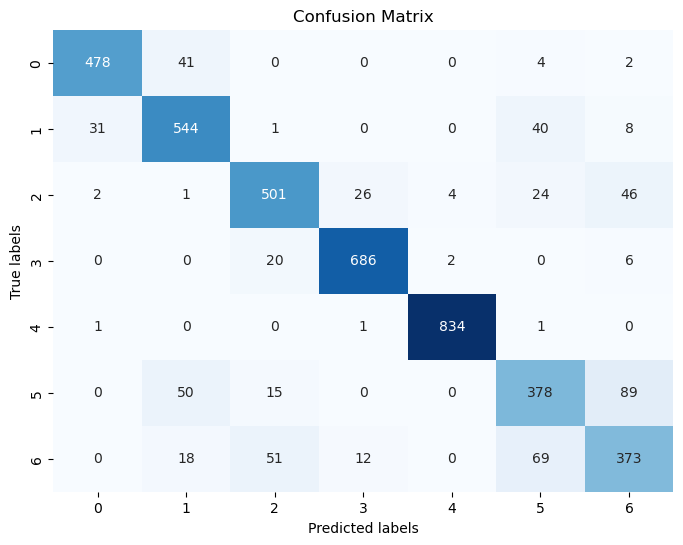

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()